# Compare Urban/Rural differences in main subjects(Ukrainian, Math, History, English)

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
zno = pd.read_csv('zno_preprocessed.csv')

C:\Users\Уляна\AppData\Local\Temp\ipykernel_12816\467119846.py:1: DtypeWarning: Columns (83,84,85,86,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  zno = pd.read_csv('zno_preprocessed.csv')


In [3]:
zno.head()

,outid,birth,sextypename,regname,areaname,tername,regtypename,eoname,eotypename,eoregname,eoareaname,eotername,eoparent,ukrtest,ukrteststatus,ukrptname,ukrptregname,ukrptareaname,ukrpttername,histtest,histlang,histteststatus,histptname,histptregname,histptareaname,histpttername,mathtest,mathlang,mathteststatus,mathptname,mathptregname,mathptareaname,mathpttername,phystest,physlang,physteststatus,physptname,physptregname,physptareaname,physpttername,chemtest,chemlang,chemteststatus,chemptname,chemptregname,chemptareaname,chempttername,biotest,biolang,bioteststatus,bioptname,bioptregname,bioptareaname,biopttername,geotest,geolang,geoteststatus,geoptname,geoptregname,geoptareaname,geopttername,engtest,engteststatus,engptname,engptregname,engptareaname,engpttername,deutest,deuteststatus,deuptname,deuptregname,deuptareaname,deupttername,year,tertypename,classprofilename,classlangname,fratest,frateststatus,fraptname,fraptregname,fraptareaname,frapttername,spatest,spateststatus,spaptname,spaptregname,spaptareaname,spapttername,ukrball,histball,mathball,physball,chemball,bioball,geoball,engdpalevel,engball,fradpalevel,fraball,deudpalevel,deuball,spadpalevel,spaball,ukradaptscale,age
0,a4e039d0-07ef-4a3d-820d-106dcaf01b96,2001,чоловіча,Закарпатська область,Берегівський район,с.Косонь,Випускник української школи поточного року,Косоньська загальноосвітня школа І-ІІІ ступені...,середня загальноосвітня школа,Закарпатська область,Берегівський район,с.Косонь,"Відділ освіти, молоді та спорту Берегівської р...",Українська мова і література,Не подолав поріг,Берегівська загальноосвітня школа І-ІІІ ступен...,Закарпатська область,м.Берегове,м.Берегове,Історія України,угорська,Не подолав поріг,Берегівська загальноосвітня школа І-ІІІ ступен...,Закарпатська область,м.Берегове,м.Берегове,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Біологія,угорська,Зараховано,Мукачівська загальноосвітня школа І-ІІІ ступен...,Закарпатська область,м.Мукачево,м.Мукачево,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,село,Фізико-математичний,угорська,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,24.0,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
1,c1fa1ed0-d2af-4964-9a88-3c138008304b,2001,жіноча,Київська область,Київська область,м.Бровари,Випускник української школи поточного року,Броварська спеціалізована школа І-ІІІ ступенів...,спеціалізована школа,Київська область,м.Бровари,м.Бровари,Управління освіти і науки Броварської міської ...,Українська мова і література,Зараховано,Комунальний вищий навчальний заклад Київської ...,Київська область,м.Бровари,м.Бровари,Історія України,українська,Зараховано,Броварська загальноосвітня школа І-ІІІ ступені...,Київська область,м.Бровари,м.Бровари,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Географія,українська,Зараховано,Броварська спеціалізована школа І-ІІІ ступенів...,Київська область,м.Бровари,м.Бровари,Англійська мова,Зараховано,Броварська загальноосвітня школа І-ІІІ ступені...,Київська область,м.Бровари,м.Бровари,NaN,NaN,NaN,NaN,NaN,NaN,2018,місто,Іноземної філології,українська,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,56.0,NaN,NaN,NaN,NaN,43.0,профільний,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2,6504a7f3-7dfd-4a64-a2d9-4d49f5021303,2000,жіноча,Харківська область,м.Харків,Червонозаводський район міста,Випускник української школи поточного року,Харківська гімназія № 12 Харківської міської р...,гімназія,Харківська область,м.Харків. Червонозаводський район міста,Червонозаводський район міста,Управління освіти адміністрації Основ'янського...,Українська мова і література,Зараховано,Харківський інститут фінансів Київського націо...,Харківська область,м.Харків. Червонозаводський район міста,Червонозаводський район міста,Історія України,українська,Зараховано,Харківський національний автомобільно-дорожній...,Харківська область,м.Харків. Московський район міста,Московський 

In [4]:
zno2 = zno[['year', 'tertypename','regtypename', 'birth', 'sextypename', 'regname', 'areaname', 'tername','eoname', 'ukrtest', 'ukrteststatus', 'ukrball', 'histtest', 'histteststatus', 'histball',
     'mathtest','mathteststatus', 'mathball','phystest', 'physteststatus','physball' ,'chemtest', 'chemteststatus','chemball','biotest','bioteststatus','bioball',
    'geotest', 'geoteststatus','geoball', 'engtest', 'engteststatus', 'engball', 'deutest', 'deuteststatus','deuball', 'fratest', 'frateststatus', 'fraball','spatest', 
    'spateststatus', 'spaball']]
zno2['eoname'].fillna('інше', inplace=True)

In [6]:
zno_ukr = zno2[['year', 'tertypename', 'eoname','regtypename', 'birth', 'sextypename', 'regname', 'ukrtest', 'ukrteststatus', 'ukrball']]
zno_ukr=zno_ukr.dropna(axis='rows')
#zno_ukr.sort_values(by='ukrball', inplace=True)
zno_ukr = zno_ukr[zno_ukr['ukrball'] != 0.0] 
zno_ukr = zno_ukr.replace('селище, село', 'село')
zno_ukr.loc[zno_ukr['tertypename'] != 'місто', 'tertypename'] = 'село'


In [7]:
zno_ukr.head()

,year,tertypename,eoname,regtypename,birth,sextypename,regname,ukrtest,ukrteststatus,ukrball
0,2018,село,Косоньська загальноосвітня школа І-ІІІ ступені...,Випускник української школи поточного року,2001,чоловіча,Закарпатська область,Українська мова і література,Не подолав поріг,15.0
1,2018,місто,Броварська спеціалізована школа І-ІІІ ступенів...,Випускник української школи поточного року,2001,жіноча,Київська область,Українська мова і література,Зараховано,87.0
2,2018,місто,Харківська гімназія № 12 Харківської міської р...,Випускник української школи поточного року,2000,жіноча,Харківська область,Українська мова і література,Зараховано,88.0
3,2018,місто,Млинівська загальноосвітня школа І-ІІІ ступені...,Випускник української школи поточного року,2000,чоловіча,Рівненська область,Українська мова і література,Зараховано,34.0
4,2018,місто,Державний професійно-технічний навчальний закл...,Випускник коледжу,1999,чоловіча,Рівненська область,Українська мова і література,Зараховано,26.0


In [8]:
zno_ukr.loc[zno_ukr["year"] == 2018, 'ukrball'] = zno_ukr.loc[zno_ukr["year"] == 2018]['ukrball']/ (zno_ukr.loc[zno_ukr["year"] == 2018]['ukrball']).max()
zno_ukr.loc[zno_ukr["year"] == 2019, 'ukrball'] = zno_ukr.loc[zno_ukr["year"] == 2019]['ukrball']/ (zno_ukr.loc[zno_ukr["year"] == 2019]['ukrball']).max()
zno_ukr.loc[zno_ukr["year"] == 2020, 'ukrball'] = zno_ukr.loc[zno_ukr["year"] == 2020]['ukrball']/ (zno_ukr.loc[zno_ukr["year"] == 2020]['ukrball']).max()
zno_ukr.loc[zno_ukr["year"] == 2021, 'ukrball'] = zno_ukr.loc[zno_ukr["year"] == 2021]['ukrball']/ (zno_ukr.loc[zno_ukr["year"] == 2021]['ukrball']).max()


In [10]:
zno_ukr_grouped = zno_ukr.groupby('eoname').agg({"ukrball":'median', 
                                                 'year':'min', 
                                                 'tertypename':'min', 
                                                 'regname':'min', 'sextypename':'count'}).reset_index().rename(columns={"eoname": "shooltype"})
#zno_ukr_grouped.sort_values(by='ukrball', inplace=True)

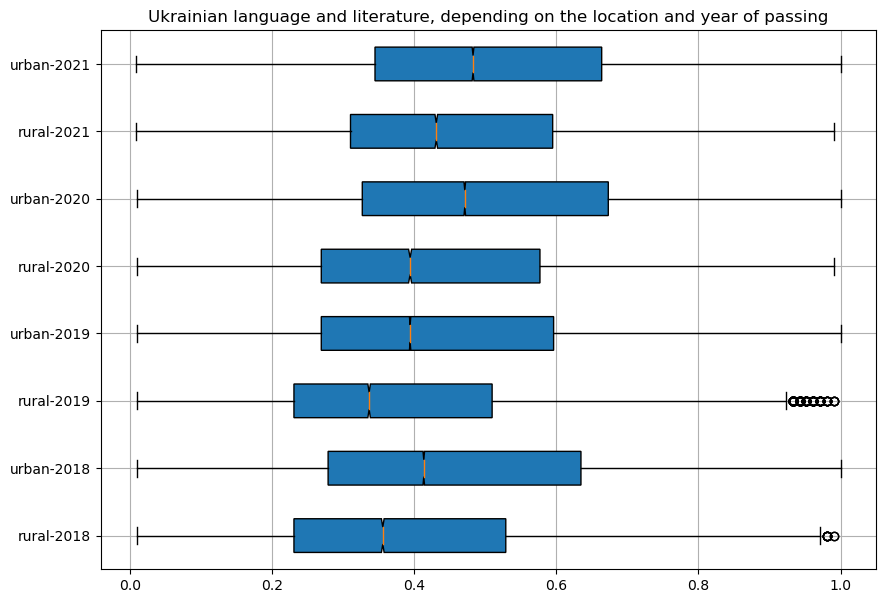

In [20]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

ax.boxplot([zno_ukr[(zno_ukr['year']==2018)&(zno_ukr['tertypename'] == 'село')]['ukrball'], 
            zno_ukr[(zno_ukr['year']==2018)&(zno_ukr['tertypename'] == 'місто')]['ukrball'],
            zno_ukr[(zno_ukr['year']==2019)&(zno_ukr['tertypename'] == 'село')]['ukrball'],
            zno_ukr[(zno_ukr['year']==2019)&(zno_ukr['tertypename'] == 'місто')]['ukrball'],
            zno_ukr[(zno_ukr['year']==2020)&(zno_ukr['tertypename'] == 'село')]['ukrball'],
            zno_ukr[(zno_ukr['year']==2020)&(zno_ukr['tertypename'] == 'місто')]['ukrball'],
            zno_ukr[(zno_ukr['year']==2021)&(zno_ukr['tertypename'] == 'село')]['ukrball'],
            zno_ukr[(zno_ukr['year']==2021)&(zno_ukr['tertypename'] == 'місто')]['ukrball']
           ], patch_artist = True,
                notch ='True', vert = 0)
ax.set_yticklabels(['rural-2018', 'urban-2018','rural-2019', "urban-2019", 'rural-2020', 
                    "urban-2020", 'rural-2021', "urban-2021"])
plt.title("Ukrainian language and literature, depending on the location and year of passing")
plt.grid(True)
plt.show()

## Description

The analysis of the obtained graph of the ZNO pass rate in the Ukrainian language and literature shows that, in general, the results of graduates have improved in both urban and rural areas. 

Thus, the median value of results in rural areas after the 2019 covid increased by 0.06 in 2020, and by 0.09 in 2021 compared to 2019. In the city, there is a similar trend, as the median value increased by 0.076 in 2020 and by 0.088 in 2021 compared to 2019. It should be noted that in general, both in urban and rural areas, the indicators fell in 2019 compared to 2018, but then they began to grow. The number of graduates who passed the ZNO with scores higher than the median values in all types of areas also increased. In general, the analysis of the boxplots shows that students who studied in urban schools have a higher level of knowledge than those who studied in villages. It also shows that quarantine has had a positive impact on the level of knowledge of Ukrainian language and literature among applicants.

In [21]:
group = zno_ukr.groupby(['year', 'tertypename']).agg({'ukrball':'median'})
group = group.reset_index()

In [22]:
pd.DataFrame(data={'rural':group[group['tertypename']=='село']['ukrball'].pct_change().values*100,
                  'urban':group[group['tertypename']=='місто']['ukrball'].pct_change().values*100,
                  'rural/urban':[16.2,17.1,19.5, 12]}, index=['2018', '2019','2020','2021'])

,rural,urban,rural/urban
2018,NaN,NaN,16.2
2019,-5.405405,-4.651163,17.1
2020,17.142857,19.512195,19.5
2021,9.335576,2.463054,12.0


# Math

In [107]:
zno_math = zno2[['year', 'tertypename', 'eoname','regtypename', 
                 'birth', 'sextypename', 'regname', 'mathtest', 'mathteststatus', 'mathball']]
zno_math=zno_math.dropna(axis='rows')
zno_math = zno_math[zno_math['mathball'] != 0.0] 
zno_math = zno_math.replace('селище, село', 'село')
zno_math.loc[zno_math['tertypename'] != 'місто', 'tertypename'] = 'село'

In [108]:
zno_math.loc[zno_math["year"] == 2018, 'mathball'] = zno_math.loc[zno_math["year"] == 2018]['mathball']/ (zno_math.loc[zno_math["year"] == 2018]['mathball']).max()
zno_math.loc[zno_math["year"] == 2019, 'mathball'] = zno_math.loc[zno_math["year"] == 2019]['mathball']/ (zno_math.loc[zno_math["year"] == 2019]['mathball']).max()
zno_math.loc[zno_math["year"] == 2020, 'mathball'] = zno_math.loc[zno_math["year"] == 2020]['mathball']/ (zno_math.loc[zno_math["year"] == 2020]['mathball']).max()
zno_math.loc[zno_math["year"] == 2021, 'mathball'] = zno_math.loc[zno_math["year"] == 2021]['mathball']/ (zno_math.loc[zno_math["year"] == 2021]['mathball']).max()


In [109]:
zno_math.head()

,year,tertypename,eoname,regtypename,birth,sextypename,regname,mathtest,mathteststatus,mathball
3,2018,місто,Млинівська загальноосвітня школа І-ІІІ ступені...,Випускник української школи поточного року,2000,чоловіча,Рівненська область,Математика,Зараховано,0.193548
7,2018,село,Стеблівська загальноосвітня школа І-ІІІ ступен...,Випускник української школи поточного року,2001,чоловіча,Закарпатська область,Математика,Зараховано,0.177419
8,2018,місто,Вознесенський професійний ліцей,Випускник коледжу,2000,жіноча,Миколаївська область,Математика,Не подолав поріг,0.096774
11,2018,місто,Новоград-Волинська загальноосвітня школа І-ІІІ...,Випускник української школи поточного року,2000,жіноча,Житомирська область,Математика,Зараховано,0.435484
22,2018,місто,інше,Випускник минулих років,1998,чоловіча,Запорізька область,Математика,Зараховано,0.258065


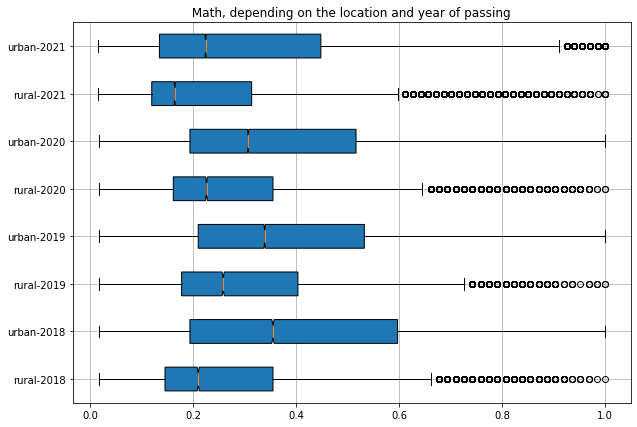

In [110]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

ax.boxplot([zno_math[(zno_math['year']==2018)&(zno_math['tertypename'] == 'село')]['mathball'], 
            zno_math[(zno_math['year']==2018)&(zno_math['tertypename'] == 'місто')]['mathball'],
            zno_math[(zno_math['year']==2019)&(zno_math['tertypename'] == 'село')]['mathball'],
            zno_math[(zno_math['year']==2019)&(zno_math['tertypename'] == 'місто')]['mathball'],
            zno_math[(zno_math['year']==2020)&(zno_math['tertypename'] == 'село')]['mathball'],
            zno_math[(zno_math['year']==2020)&(zno_math['tertypename'] == 'місто')]['mathball'],
            zno_math[(zno_math['year']==2021)&(zno_math['tertypename'] == 'село')]['mathball'],
            zno_math[(zno_math['year']==2021)&(zno_math['tertypename'] == 'місто')]['mathball']
           ], patch_artist = True,
                notch ='True', vert = 0)
ax.set_yticklabels(['rural-2018', 'urban-2018','rural-2019', "urban-2019", 'rural-2020',
                    "urban-2020", 'rural-2021', "urban-2021"])
plt.title(" Math, depending on the location and year of passing ")
plt.grid(True)
plt.show()

In [112]:
group = zno_math.groupby(['year', 'tertypename']).agg({'mathball':'median'})
group = group.reset_index()

In [114]:
group

,year,tertypename,mathball
0,2018,місто,0.354839
1,2018,село,0.209677
2,2019,місто,0.338710
3,2019,село,0.258065
4,2020,місто,0.306452
5,2020,село,0.225806
6,2021,місто,0.223881
7,2021,село,0.164179


In [115]:
pd.DataFrame(data={'rural':group[group['tertypename']=='село']['mathball'].pct_change().values*100,
                  'urban':group[group['tertypename']=='місто']['mathball'].pct_change().values*100,
                  'rural/urban':[69,31.2,35.7, 36.3]}, index=['2018', '2019','2020','2021'])

,rural,urban,rural/urban
2018,NaN,NaN,69.0
2019,23.076923,-4.545455,31.2
2020,-12.500000,-9.523810,35.7
2021,-27.292111,-26.944226,36.3


## Description

An analysis of the obtained graph of the ZNO pass rate in mathematics shows that, in general, the results of graduates have deteriorated in both urban and rural areas. 

Thus, the median value of results in rural areas after the 2019 covid fell by 0.03 in 2020, and in 2021 by 0.093 compared to 2019. In the city, there are similar dynamics, with the median value falling by 0.03 in 2020 and by 0.11 in 2021 compared to 2019. It should be noted that in rural areas, the indicators increased in 2019 compared to 2018 by 0.05, but then they began to fall. Also, in urban and rural areas, there is a fairly large number of outliers, i.e. students who passed the ZNO with fairly high scores.
In general, the analysis of the boxplots shows that students who studied in urban schools have a higher level of knowledge than those who studied in rural areas. It also shows that quarantine has had a negative impact on the level of math knowledge of applicants.

In [35]:
print((zno_math[(zno_math['year']==2018)&(zno_math['tertypename'] == 'село')]['mathball']).median())
print((zno_math[(zno_math['year']==2019)&(zno_math['tertypename'] == 'село')]['mathball']).median())
print((zno_math[(zno_math['year']==2020)&(zno_math['tertypename'] == 'село')]['mathball']).median())
print((zno_math[(zno_math['year']==2021)&(zno_math['tertypename'] == 'село')]['mathball']).median())

0.20967741935483872
0.25806451612903225
0.22580645161290322
0.16417910447761194


In [38]:
0.3387096774193548 - 0.22388059701492538

0.11482908040442943

In [36]:
print((zno_math[(zno_math['year']==2018)&(zno_math['tertypename'] == 'місто')]['mathball']).median())
print((zno_math[(zno_math['year']==2019)&(zno_math['tertypename'] == 'місто')]['mathball']).median())
print((zno_math[(zno_math['year']==2020)&(zno_math['tertypename'] == 'місто')]['mathball']).median())
print((zno_math[(zno_math['year']==2021)&(zno_math['tertypename'] == 'місто')]['mathball']).median())

0.3548387096774194
0.3387096774193548
0.3064516129032258
0.22388059701492538


# History

In [116]:
zno_h = zno2[['year', 'tertypename', 'eoname','regtypename', 
                 'birth', 'sextypename', 'regname', 'histteststatus', 'histball']]
zno_h=zno_h.dropna(axis='rows')
zno_h = zno_h[zno_h['histball'] != 0.0] 
zno_h = zno_h.replace('селище, село', 'село')
zno_h.loc[zno_h['tertypename'] != 'місто', 'tertypename'] = 'село'

In [117]:
zno_h.loc[zno_h["year"] == 2018, 'histball'] = zno_h.loc[zno_h["year"] == 2018]['histball']/ (zno_h.loc[zno_h["year"] == 2018]['histball']).max()
zno_h.loc[zno_h["year"] == 2019, 'histball'] = zno_h.loc[zno_h["year"] == 2019]['histball']/ (zno_h.loc[zno_h["year"] == 2019]['histball']).max()
zno_h.loc[zno_h["year"] == 2020, 'histball'] = zno_h.loc[zno_h["year"] == 2020]['histball']/ (zno_h.loc[zno_h["year"] == 2020]['histball']).max()
zno_h.loc[zno_h["year"] == 2021, 'histball'] = zno_h.loc[zno_h["year"] == 2021]['histball']/ (zno_h.loc[zno_h["year"] == 2021]['histball']).max()
zno_h.head()

,year,tertypename,eoname,regtypename,birth,sextypename,regname,histteststatus,histball
0,2018,село,Косоньська загальноосвітня школа І-ІІІ ступені...,Випускник української школи поточного року,2001,чоловіча,Закарпатська область,Не подолав поріг,0.255319
1,2018,місто,Броварська спеціалізована школа І-ІІІ ступенів...,Випускник української школи поточного року,2001,жіноча,Київська область,Зараховано,0.595745
2,2018,місто,Харківська гімназія № 12 Харківської міської р...,Випускник української школи поточного року,2000,жіноча,Харківська область,Зараховано,0.648936
6,2018,село,"Таврійський навчально-виховний комплекс "" Зага...",Випускник української школи поточного року,2001,жіноча,Запорізька область,Зараховано,0.446809
7,2018,село,Стеблівська загальноосвітня школа І-ІІІ ступен...,Випускник української школи поточного року,2001,чоловіча,Закарпатська область,Не подолав поріг,0.265957


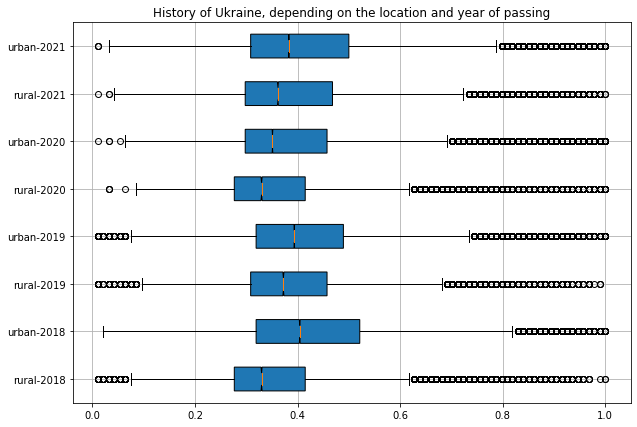

In [119]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

ax.boxplot([zno_h[(zno_h['year']==2018)&(zno_h['tertypename'] == 'село')]['histball'], 
            zno_h[(zno_h['year']==2018)&(zno_h['tertypename'] == 'місто')]['histball'],
            zno_h[(zno_h['year']==2019)&(zno_h['tertypename'] == 'село')]['histball'],
            zno_h[(zno_h['year']==2019)&(zno_h['tertypename'] == 'місто')]['histball'],
            zno_h[(zno_h['year']==2020)&(zno_h['tertypename'] == 'село')]['histball'],
            zno_h[(zno_h['year']==2020)&(zno_h['tertypename'] == 'місто')]['histball'],
            zno_h[(zno_h['year']==2021)&(zno_h['tertypename'] == 'село')]['histball'],
            zno_h[(zno_h['year']==2021)&(zno_h['tertypename'] == 'місто')]['histball']
           ], patch_artist = True,
                notch ='True', vert = 0)
ax.set_yticklabels(['rural-2018', 'urban-2018','rural-2019', "urban-2019", 'rural-2020', 
                    "urban-2020", 'rural-2021', "urban-2021"])
plt.title("History of Ukraine, depending on the location and year of passing")
plt.grid(True)
plt.show()

In [121]:
group = zno_h.groupby(['year', 'tertypename']).agg({'histball':'median'})
group = group.reset_index()
group

,year,tertypename,histball
0,2018,місто,0.404255
1,2018,село,0.329787
2,2019,місто,0.393617
3,2019,село,0.372340
4,2020,місто,0.351064
5,2020,село,0.329787
6,2021,місто,0.382979
7,2021,село,0.361702


In [123]:
pd.DataFrame(data={'rural':group[group['tertypename']=='село']['histball'].pct_change().values*100,
                  'urban':group[group['tertypename']=='місто']['histball'].pct_change().values*100,
                  'rural/urban':[22.5,5.7,6.5, 5.8]}, index=['2018', '2019','2020','2021'])

,rural,urban,rural/urban
2018,NaN,NaN,22.5
2019,12.903226,-2.631579,5.7
2020,-11.428571,-10.810811,6.5
2021,9.677419,9.090909,5.8


## Description
The analysis of the obtained graph of the ZNO passing rate in history shows that, in general, the results of graduates vary from year to year, both in urban and rural areas.

Thus, the median value of the results in rural areas after COVID 2019 fell by 0.05 in 2020, and in 2021 compared to 2019 by 0.01, but if we compare 2020 and 2021, it increased by 0.04. In the city, there is a similar trend, as the median value fell by 0.04 in 2020 compared to 2019. 04 in 2020 and by 0.01 in 2021, but compared to 2020, it increased by 0.03 in 2021. Also, in urban and rural areas there is a fairly large number of outliers, that is, students who passed the ZNO with high enough scores or low enough scores. Basically, all the data are unevenly distributed and more concentrated in the direction of high scores.
In general, the analysis of the boxplots shows that the level of knowledge of students who studied in urban schools is higher than that of those who studied in villages. It also shows that quarantine has had a negative impact on the level of knowledge of Ukrainian history among applicants.

In [49]:
print((zno_h[(zno_h['year']==2018)&(zno_h['tertypename'] == 'село')]['histball']).median())
print((zno_h[(zno_h['year']==2019)&(zno_h['tertypename'] == 'село')]['histball']).median())
print((zno_h[(zno_h['year']==2020)&(zno_h['tertypename'] == 'село')]['histball']).median())
print((zno_h[(zno_h['year']==2021)&(zno_h['tertypename'] == 'село')]['histball']).median())

0.32978723404255317
0.3723404255319149
0.32978723404255317
0.3617021276595745


In [45]:
print((zno_h[(zno_h['year']==2018)&(zno_h['tertypename'] == 'місто')]['histball']).median())
print((zno_h[(zno_h['year']==2019)&(zno_h['tertypename'] == 'місто')]['histball']).median())
print((zno_h[(zno_h['year']==2020)&(zno_h['tertypename'] == 'місто')]['histball']).median())
print((zno_h[(zno_h['year']==2021)&(zno_h['tertypename'] == 'місто')]['histball']).median())

0.40425531914893614
0.39361702127659576
0.35106382978723405
0.3829787234042553


# English

In [124]:
zno_e = zno2[['year', 'tertypename', 'eoname','regtypename', 
                 'birth', 'sextypename', 'regname', 'engteststatus', 'engball']]
zno_e=zno_e.dropna(axis='rows')
zno_e = zno_e[zno_e['engball'] != 0.0] 
zno_e = zno_e.replace('селище, село', 'село')
zno_e.loc[zno_e['tertypename'] != 'місто', 'tertypename'] = 'село'

In [125]:
zno_e.loc[zno_e["year"] == 2018, 'engball'] = zno_e.loc[zno_e["year"] == 2018]['engball']/ (zno_e.loc[zno_e["year"] == 2018]['engball']).max()
zno_e.loc[zno_e["year"] == 2019, 'engball'] = zno_e.loc[zno_e["year"] == 2019]['engball']/ (zno_e.loc[zno_e["year"] == 2019]['engball']).max()
zno_e.loc[zno_e["year"] == 2020, 'engball'] = zno_e.loc[zno_e["year"] == 2020]['engball']/ (zno_e.loc[zno_e["year"] == 2020]['engball']).max()
zno_e.loc[zno_e["year"] == 2021, 'engball'] = zno_e.loc[zno_e["year"] == 2021]['engball']/ (zno_e.loc[zno_e["year"] == 2021]['engball']).max()
zno_e.head()

,year,tertypename,eoname,regtypename,birth,sextypename,regname,engteststatus,engball
1,2018,місто,Броварська спеціалізована школа І-ІІІ ступенів...,Випускник української школи поточного року,2001,жіноча,Київська область,Зараховано,0.875000
2,2018,місто,Харківська гімназія № 12 Харківської міської р...,Випускник української школи поточного року,2000,жіноча,Харківська область,Зараховано,0.763889
11,2018,місто,Новоград-Волинська загальноосвітня школа І-ІІІ...,Випускник української школи поточного року,2000,жіноча,Житомирська область,Зараховано,0.541667
15,2018,місто,"УМАНСЬКИЙ НАВЧАЛЬНО - ВИХОВНИЙ КОМПЛЕКС ""ЗАГАЛ...",Випускник української школи поточного року,2001,жіноча,Черкаська область,Не подолав поріг,0.152778
24,2018,місто,інше,Випускник минулих років,1999,жіноча,Львівська область,Не подолав поріг,0.250000


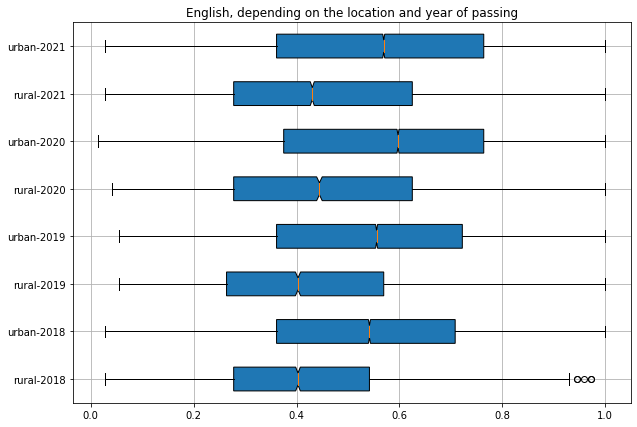

In [127]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

ax.boxplot([zno_e[(zno_e['year']==2018)&(zno_e['tertypename'] == 'село')]['engball'], 
            zno_e[(zno_e['year']==2018)&(zno_e['tertypename'] == 'місто')]['engball'],
            zno_e[(zno_e['year']==2019)&(zno_e['tertypename'] == 'село')]['engball'],
            zno_e[(zno_e['year']==2019)&(zno_e['tertypename'] == 'місто')]['engball'],
            zno_e[(zno_e['year']==2020)&(zno_e['tertypename'] == 'село')]['engball'],
            zno_e[(zno_e['year']==2020)&(zno_e['tertypename'] == 'місто')]['engball'],
            zno_e[(zno_e['year']==2021)&(zno_e['tertypename'] == 'село')]['engball'],
            zno_e[(zno_e['year']==2021)&(zno_e['tertypename'] == 'місто')]['engball']
           ], patch_artist = True,
                notch ='True', vert = 0)
ax.set_yticklabels(['rural-2018', 'urban-2018','rural-2019', "urban-2019", 'rural-2020', 
                    "urban-2020", 'rural-2021', "urban-2021"])
plt.title("English, depending on the location and year of passing")
plt.grid(True)
plt.show()

In [129]:
group = zno_e.groupby(['year', 'tertypename']).agg({'engball':'median'})
group = group.reset_index()
group

,year,tertypename,engball
0,2018,місто,0.541667
1,2018,село,0.402778
2,2019,місто,0.555556
3,2019,село,0.402778
4,2020,місто,0.597222
5,2020,село,0.444444
6,2021,місто,0.569444
7,2021,село,0.430556


In [131]:
pd.DataFrame(data={'rural':group[group['tertypename']=='село']['engball'].pct_change().values*100,
                  'urban':group[group['tertypename']=='місто']['engball'].pct_change().values*100,
                  'rural/urban':[34.5,37.9,34.4, 32.3]}, index=['2018', '2019','2020','2021'])

,rural,urban,rural/urban
2018,NaN,NaN,34.5
2019,0.000000,2.564103,37.9
2020,10.344828,7.500000,34.4
2021,-3.125000,-4.651163,32.3


## Description
The analysis of the obtained graph of the ZNO English language passing rate indicates that, in general, the results of graduates vary from year to year, both in urban and rural areas.

Thus, the median value of results in rural areas after the 2019 covid increased by 0.04 in 2020, and in 2021 by 0.03 compared to 2019, but if we compare 2020 and 2021, it fell by 0.01. In the city, there is a similar trend, as the median value compared to 2019 increased by 0.04 in 2020 and by 0.01 in 2021, but compared to 2020 in 2021, it fell by 0.03. Basically, all data are unevenly distributed and more concentrated in the direction of low scores.
In general, the analysis of the boxplots shows that students who studied in urban schools have a higher level of knowledge than those who studied in villages. It also shows that the quarantine had a positive impact on the level of English language proficiency of the applicants.

In [57]:
print((zno_e[(zno_e['year']==2018)&(zno_e['tertypename'] == 'село')]['engball']).median())
print((zno_e[(zno_e['year']==2019)&(zno_e['tertypename'] == 'село')]['engball']).median())
print((zno_e[(zno_e['year']==2020)&(zno_e['tertypename'] == 'село')]['engball']).median())
print((zno_e[(zno_e['year']==2021)&(zno_e['tertypename'] == 'село')]['engball']).median())

0.4027777777777778
0.4027777777777778
0.4444444444444444
0.4305555555555556


In [54]:
print((zno_e[(zno_e['year']==2018)&(zno_e['tertypename'] == 'місто')]['engball']).median())
print((zno_e[(zno_e['year']==2019)&(zno_e['tertypename'] == 'місто')]['engball']).median())
print((zno_e[(zno_e['year']==2020)&(zno_e['tertypename'] == 'місто')]['engball']).median())
print((zno_e[(zno_e['year']==2021)&(zno_e['tertypename'] == 'місто')]['engball']).median())

0.5416666666666666
0.5555555555555556
0.5972222222222222
0.5694444444444444
